In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("../DataSets/Space_Corrected.csv")

In [39]:
df

,Unnamed: 0.1,Unnamed: 0,CompanyName,Location,Datum,Rocket,Status Rocket,Price,StatusMission,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,Aug
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,Aug
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020,Aug
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,Jul
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,Jul
...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure,1958,Feb
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success,1958,Feb
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure,1957,Dec
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success,1957,Nov


In [77]:
df.columns=df.columns.str.replace(" ","")

# Data Preperation
### Identifying Missing Values and Finding it

In [21]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [32]:
df.isnull().sum()

Unnamed: 0.1     0
Unnamed: 0       0
CompanyName      0
Location         0
Datum            0
Rocket           0
Status Rocket    0
Price            0
StatusMission    0
dtype: int64

In [22]:
df.columns.unique()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [28]:
df.Price=df.Price.fillna(0)

### Identify Missing Value and find it

In [ ]:
df.dtypes

### Extract Month and Date Column

In [38]:
df['Year']=df['Datum'].str[12:16]
df['Month']=df['Datum'].str[4:8]

### Covert Data Types if needed

In [96]:
df.Year=df.Year.astype('int64')
df.Price=df.Price.replace("[,]",'',regex=True).astype('float64')

In [97]:
df.dtypes

Unnamed:0.1        int64
Unnamed:0          int64
CompanyName       object
Location          object
Datum             object
Rocket            object
StatusRocket      object
Price            float64
StatusMission     object
Year               int64
Month             object
dtype: object

In [98]:
df.Rocket.value_counts()

Rocket
Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Lambda-IV S | Osumi                    5
Titan IIID | KH-9                      4
                                      ..
Vanguard | Vanguard TV3BU              1
Juno I | Explorer 1                    1
Vanguard | Vanguard TV3                1
Sputnik 8K71PS | Sputnik-2             1
Sputnik 8K71PS | Sputnik-1             1
Name: count, Length: 4278, dtype: int64

### Rename Column if Needed

In [24]:
df=df.rename(columns={"Company Name":"CompanyName"})
df=df.rename(columns={"Status Mission":"StatusMission"})

In [25]:
df=df.rename(columns={"Detail":"Rocket"})

In [26]:
df=df.rename(columns={' Rocket':'Price'})

In [27]:
df.CompanyName.value_counts().nlargest(10)

CompanyName
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

# Exploratory Data Analysis

### What is Distribution of numerical Feature such as mission Cost and Launch Year?

In [99]:
df.Price.describe()

count    4324.000000
mean       34.286698
std       150.442829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5000.000000
Name: Price, dtype: float64

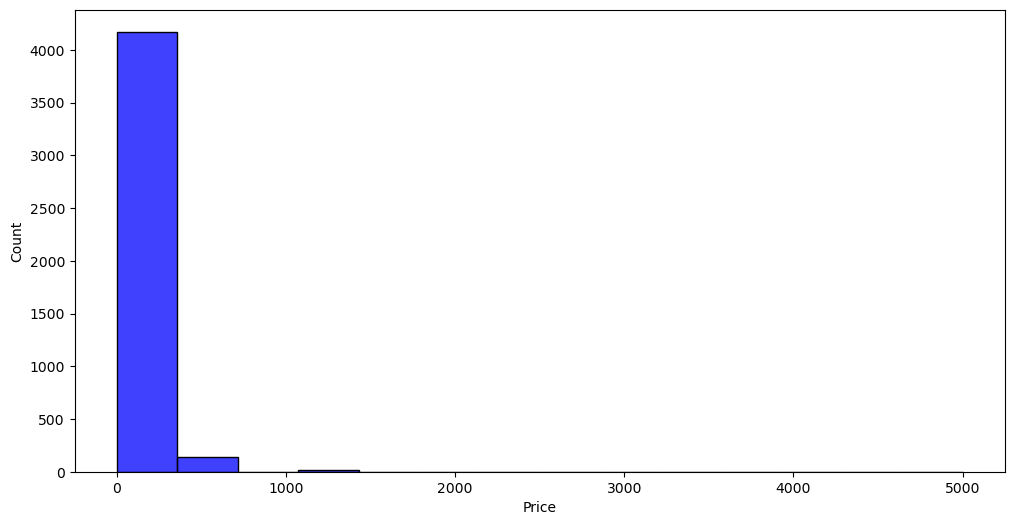

In [123]:
plt.figure(figsize=(12,6))
sb.histplot(x=df.Price,color='BLUE')
plt.show()

### What is Frequency Distribution of Categorical Features like CompanyName, Rocket, StatusMission?

In [50]:
df.StatusMission.value_counts()

StatusMission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

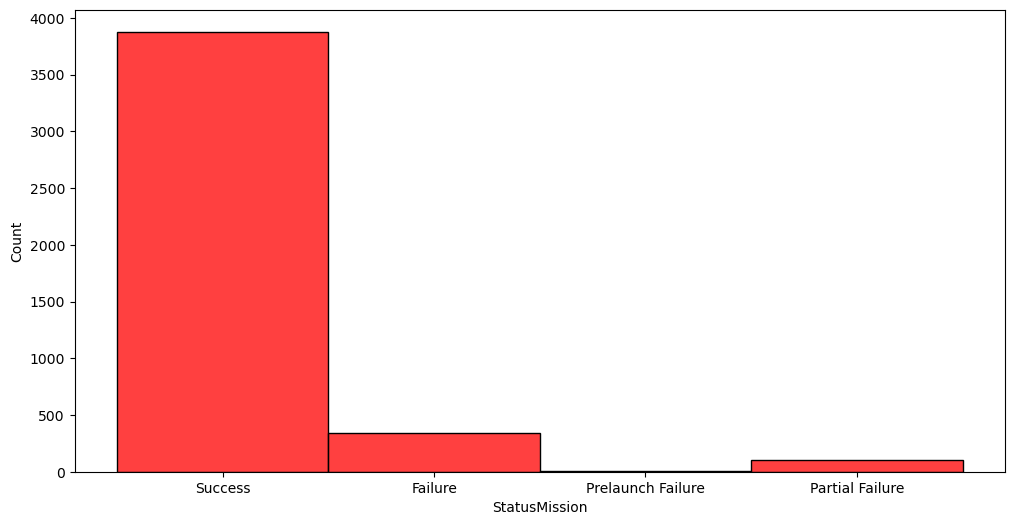

In [51]:
plt.figure(figsize=(12,6))
sb.histplot(df.StatusMission,color='RED')
plt.show()

In [49]:
df.Rocket.value_counts()

Rocket
Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Lambda-IV S | Osumi                    5
Titan IIID | KH-9                      4
                                      ..
Vanguard | Vanguard TV3BU              1
Juno I | Explorer 1                    1
Vanguard | Vanguard TV3                1
Sputnik 8K71PS | Sputnik-2             1
Sputnik 8K71PS | Sputnik-1             1
Name: count, Length: 4278, dtype: int64

In [46]:
df.CompanyName.value_counts().nlargest(10)

CompanyName
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

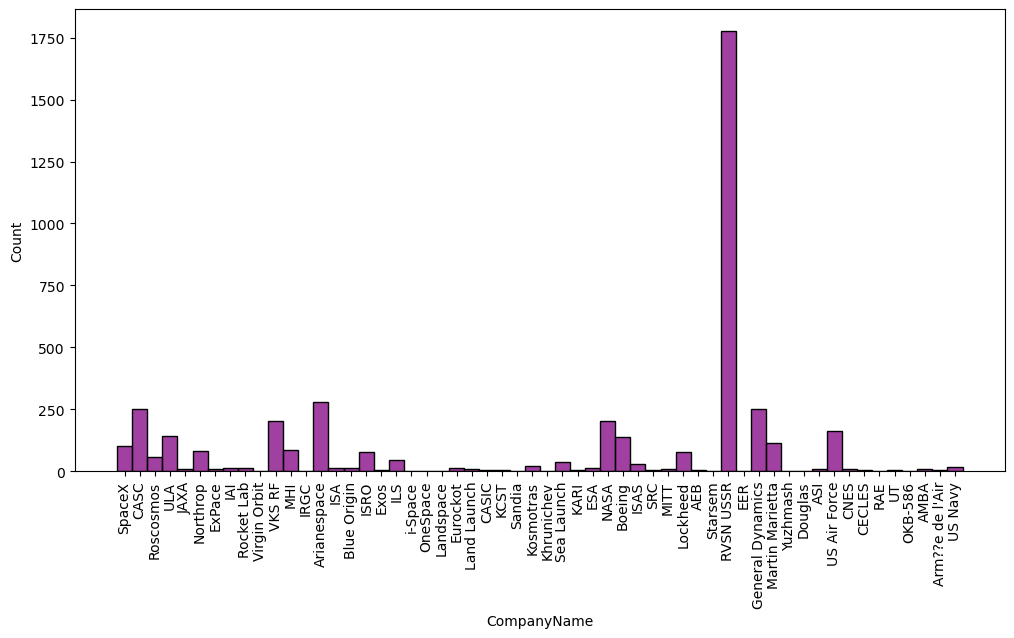

In [48]:
plt.figure(figsize=(12,6))
sb.histplot(df.CompanyName,color='PURPLE')
plt.xticks(rotation=90)
plt.show()

In [40]:
df.Year.describe()

count     4324
unique      64
top       1971
freq       119
Name: Year, dtype: object

In [42]:
df.Year.astype("int64")

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Year, Length: 4324, dtype: int64

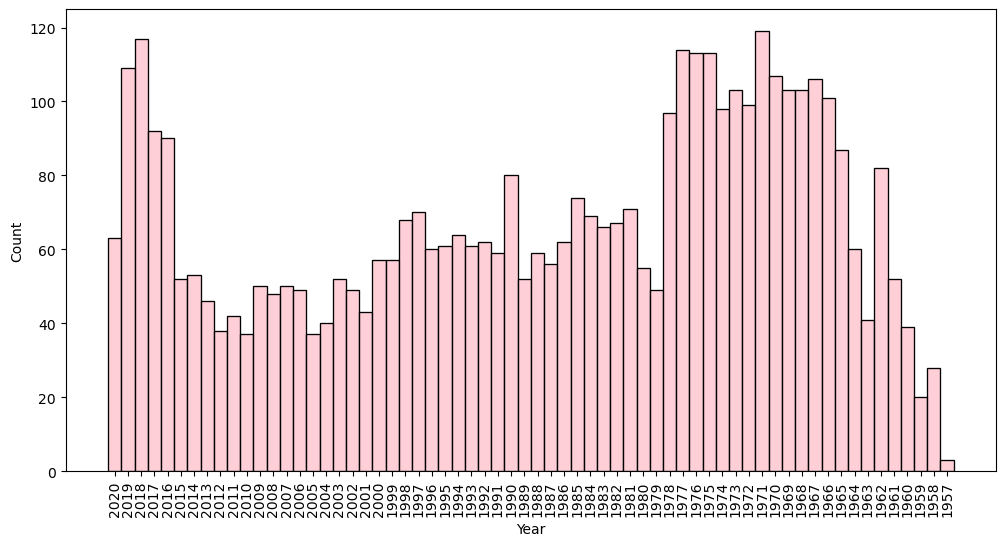

In [52]:
plt.figure(figsize=(12,6))
sb.histplot(df.Year,color='PINK')
plt.xticks(rotation=90)
plt.show()

### What is the distribution of mission costs, and are there any notable outliers

In [95]:
df.Price.describe()

count     4324
unique      57
top          0
freq      3360
Name: Price, dtype: int64

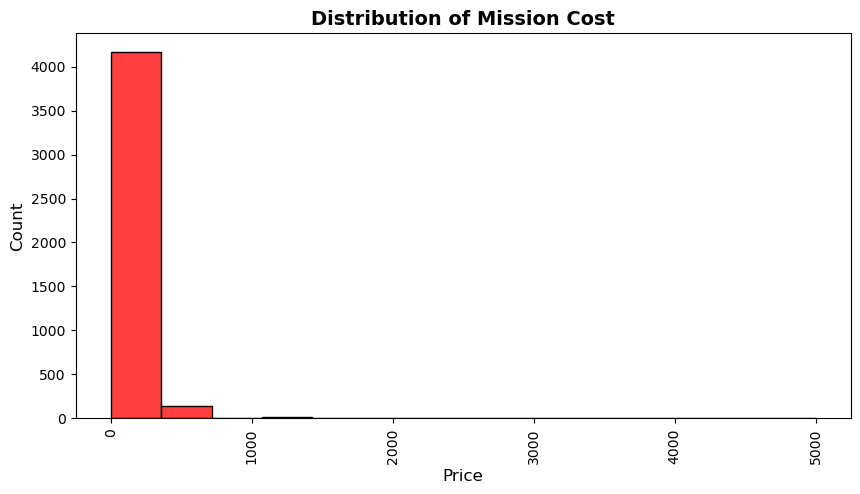

In [101]:
plt.figure(figsize=(10,5))
sb.histplot(df.Price,color='Red')
plt.title('Distribution of Mission Cost',fontsize=14, fontweight='bold')
plt.xlabel('Price',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90)
plt.show()

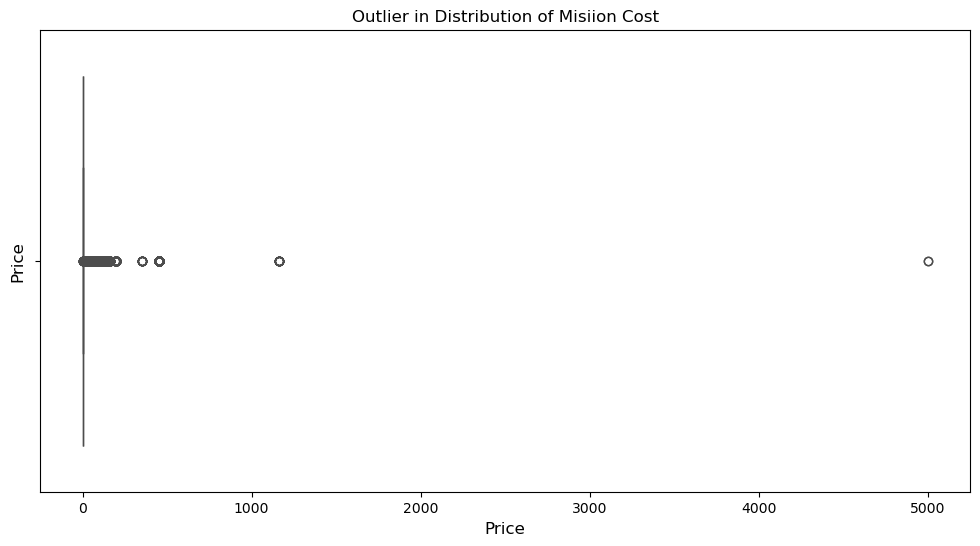

In [102]:
plt.figure(figsize=(12,6))
sb.boxplot(x=df.Price,color='RED')
plt.title('Outlier in Distribution of Misiion Cost')
plt.xlabel('Price',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

# Top Launching Agencies
### Which organizations have conducted the most launches?

In [57]:
r=df.CompanyName.value_counts().nlargest(10)

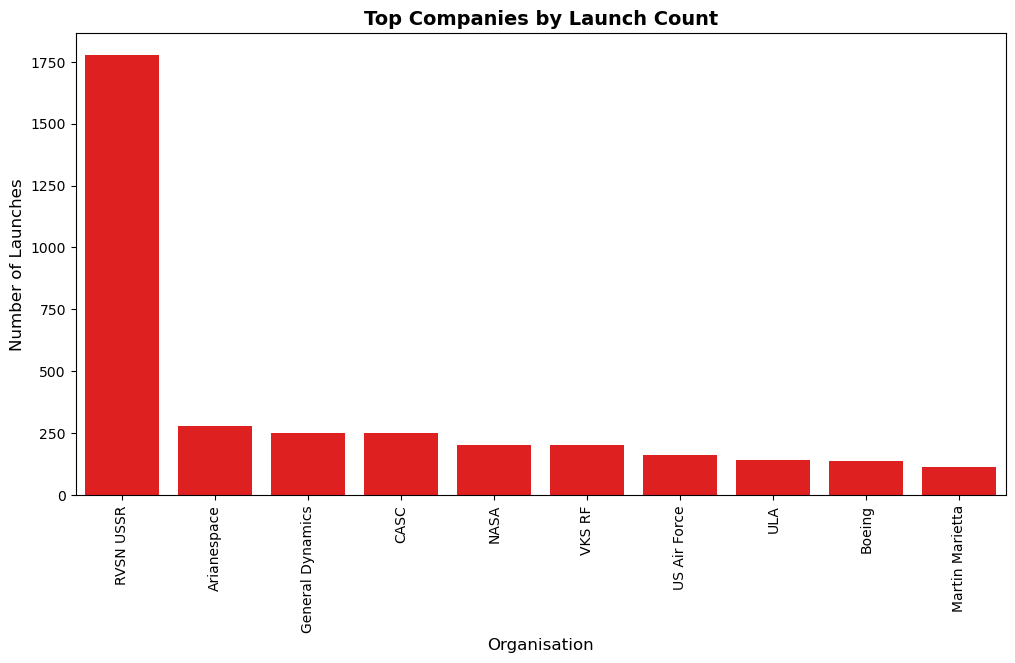

In [58]:
plt.figure(figsize=(12,6))
sb.barplot(x=r.index, y=r.values, color='RED')  
plt.xlabel('Organisation', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Top Companies by Launch Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

### How Many Successful Space Mission has each Comapany Conducted?

In [126]:
 df[df['StatusMission'] == 'Success'].groupby('CompanyName').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(10)

,CompanyName,Count
35,RVSN USSR,1614
2,Arianespace,269
6,CASC,231
14,General Dynamics,203
46,VKS RF,188
31,NASA,186
42,ULA,139
5,Boeing,131
43,US Air Force,129
30,Martin Marietta,100


### Who has highest no. of failed and Partially Failed Mission?

In [127]:
df[df['StatusMission'] == 'Failure'].groupby('CompanyName').size().reset_index(name='Count').sort_values(by='Count',ascending=True).head(10)

,CompanyName,Count
12,Exos,1
11,ExPace,1
10,Eurockot,1
8,EER,1
25,MITT,1
22,Landspace,1
21,Kosmotras,1
18,JAXA,1
30,RAE,1
29,OneSpace,1


# Launch Site Analysis
### What are the top locations used for launches?

In [65]:
R=df.Location.value_counts().nlargest(10)

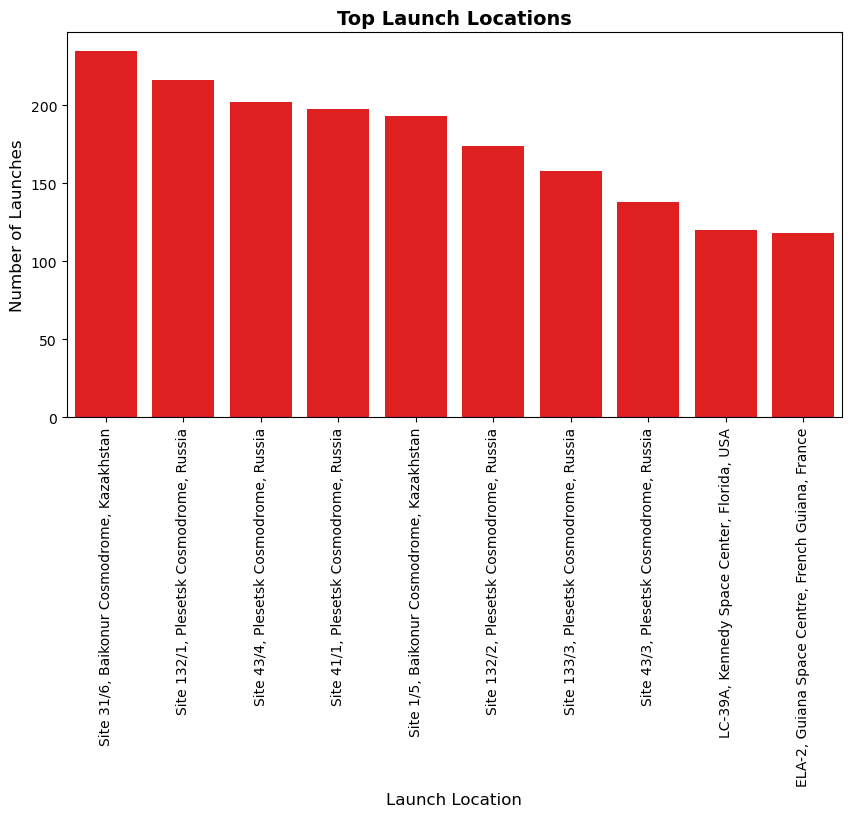

In [66]:
plt.figure(figsize=(10,5))
sb.barplot(x=R.index, y=R.values, color='Red') 
plt.xlabel('Launch Location', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Top Launch Locations', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

### Which launch sites have higher success rates?

In [68]:
df[df['StatusMission'] == 'Success'].groupby('Location').size().reset_index(name='Count').sort_values(by='Count',ascending=False)

,Location,Count
98,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",220
84,"Site 132/1, Plesetsk Cosmodrome, Russia",203
106,"Site 43/4, Plesetsk Cosmodrome, Russia",190
103,"Site 41/1, Plesetsk Cosmodrome, Russia",186
85,"Site 132/2, Plesetsk Cosmodrome, Russia",164
...,...,...
77,"Santa Rita 2, San Marco Launch Platform, Kenya",1
108,"Site 45/2, Baikonur Cosmodrome, Kazakhstan",1
97,"Site 250, Baikonur Cosmodrome, Kazakhstan",1
124,"Tai Rui Barge, Yellow Sea",1


# Rocket Usage and Status
### Which rockets are used most frequently?

In [69]:
df['Rocket'].value_counts()

Rocket
Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Lambda-IV S | Osumi                    5
Titan IIID | KH-9                      4
                                      ..
Vanguard | Vanguard TV3BU              1
Juno I | Explorer 1                    1
Vanguard | Vanguard TV3                1
Sputnik 8K71PS | Sputnik-2             1
Sputnik 8K71PS | Sputnik-1             1
Name: count, Length: 4278, dtype: int64

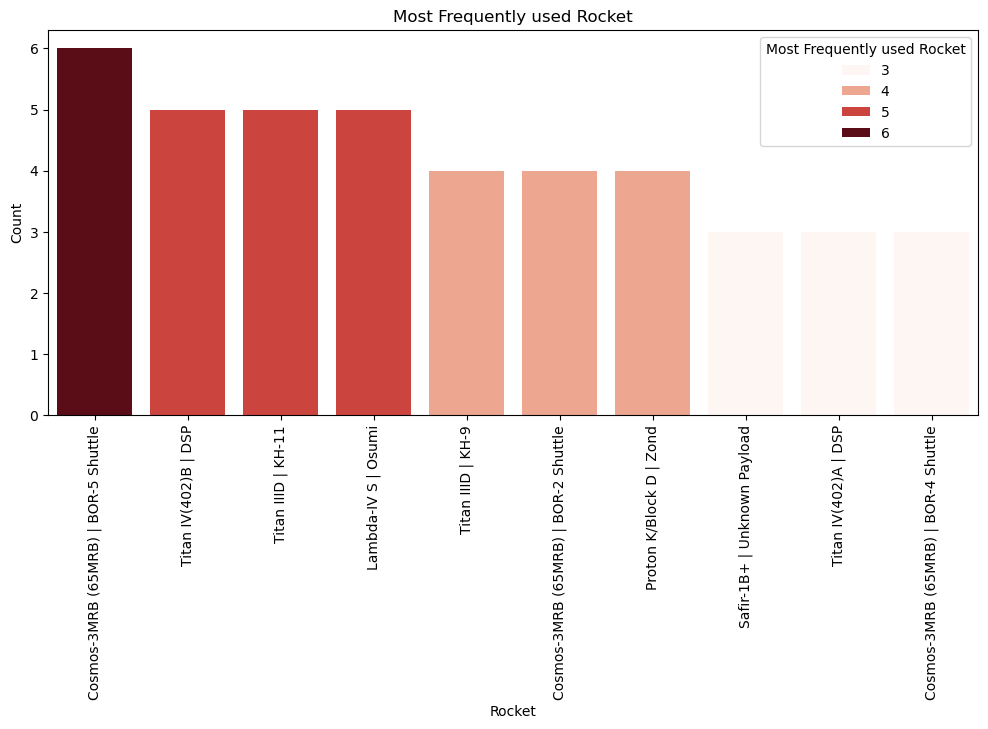

In [134]:
a=df.Rocket.value_counts().nlargest(10)
plt.figure(figsize=(12,5))
sb.barplot(x=a.index,y=a.values,hue=a,palette='Reds')
plt.title('Most Frequently used Rocket')
plt.xlabel('Rocket')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Most Frequently used Rocket',bbox_to_anchor=(1.0,1.0))
plt.show()

### How manyrockets are still active vs. retired?

In [78]:
df['StatusRocket'].value_counts()

StatusRocket
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

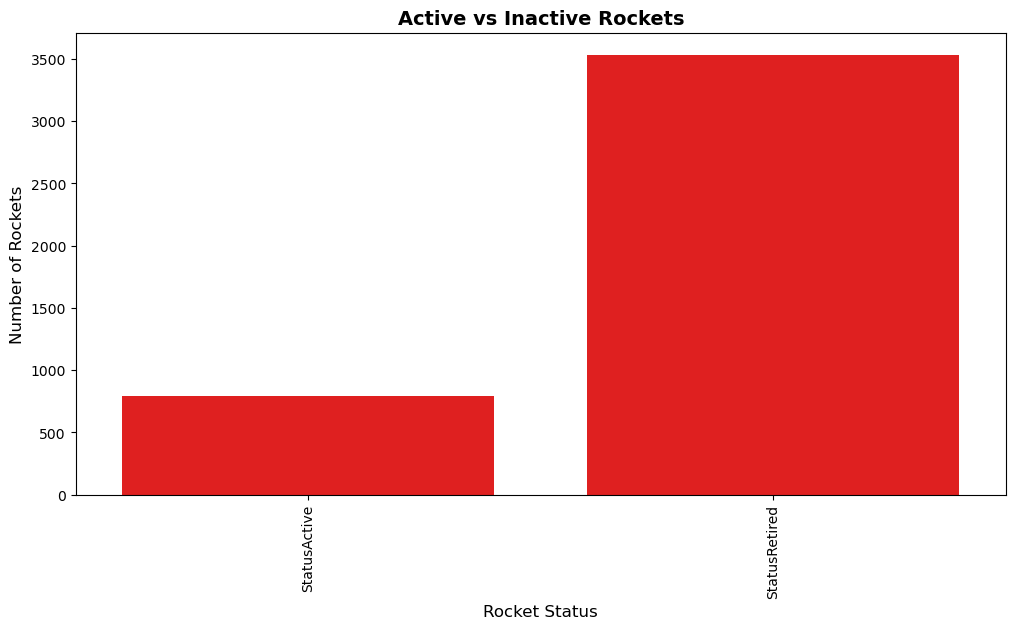

In [79]:
plt.figure(figsize=(12,6))
sb.countplot(x=df.StatusRocket, color='RED') 
plt.xlabel('Rocket Status', fontsize=12)
plt.ylabel('Number of Rockets', fontsize=12)
plt.title('Active vs Inactive Rockets', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

# Cost Analysis
### Which companies spend the most?

In [118]:
d1=d1.groupby('CompanyName')['Price'].mean().nlargest(10)

In [119]:
d1

CompanyName
NASA           375.763547
ULA            105.700000
Arianespace     58.584229
SpaceX          54.440000
Northrop        47.349398
MHI             42.053571
Eurockot        41.800000
Kosmotras       29.000000
ILS             28.695652
ISRO            28.644737
Name: Price, dtype: float64

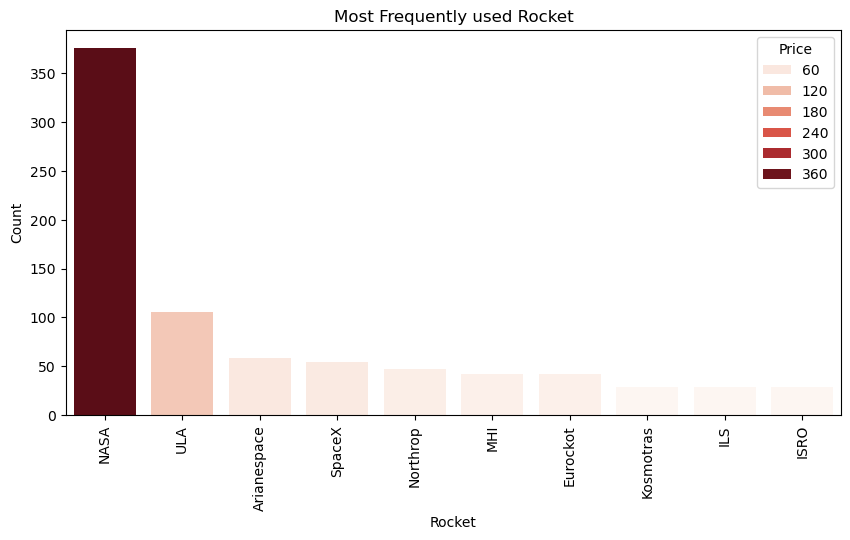

In [120]:
plt.figure(figsize=(10,5))
sb.barplot(x=d1.index,y=d1.values,hue=d1,palette='Reds')
plt.title('Most Frequently used Rocket')
plt.xlabel('Rocket')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Which missions or rockets are the most expensive?

In [111]:
d2=df.groupby('Rocket')['Price'].mean().nlargest(10)

In [112]:
d2

Rocket
Energiya/Buran | Buran                    5000.0
Energiya/Polyus | Polyus Space Station    5000.0
Saturn V | Apollo 10                      1160.0
Saturn V | Apollo 11                      1160.0
Saturn V | Apollo 12                      1160.0
Saturn V | Apollo 13                      1160.0
Saturn V | Apollo 14                      1160.0
Saturn V | Apollo 15                      1160.0
Saturn V | Apollo 16                      1160.0
Saturn V | Apollo 17                      1160.0
Name: Price, dtype: float64

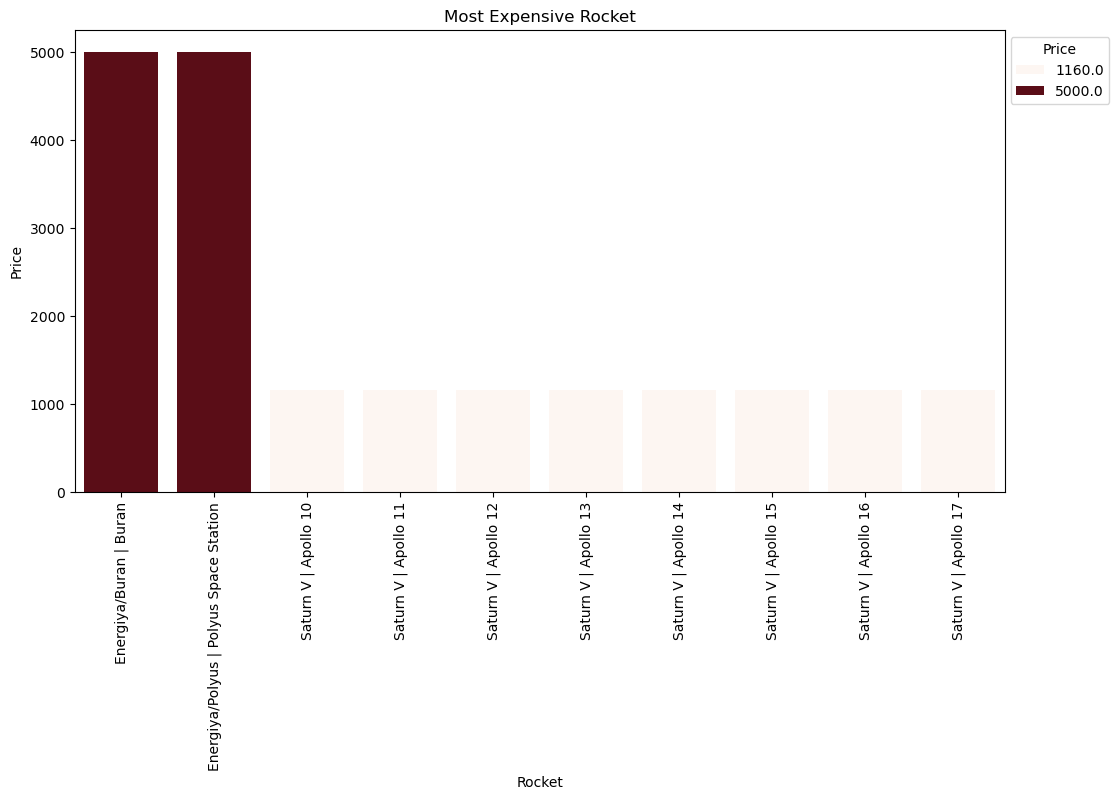

In [130]:
plt.figure(figsize=(12,6))
sb.barplot(x=d2.index,y=d2.values,hue=d2,palette='Reds')
plt.title('Most Expensive Rocket')
plt.xlabel('Rocket')
plt.ylabel('Price')
plt.legend(title='Price',bbox_to_anchor=(1.12,1.0))
plt.xticks(rotation=90)
plt.show()

# Temporal Trends
### How hasthenumberof space launches changed over the Years?

In [84]:
df['Year'].value_counts().sort_index()

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: count, Length: 64, dtype: int64

In [85]:
a1=df.Year.value_counts().sort_index()

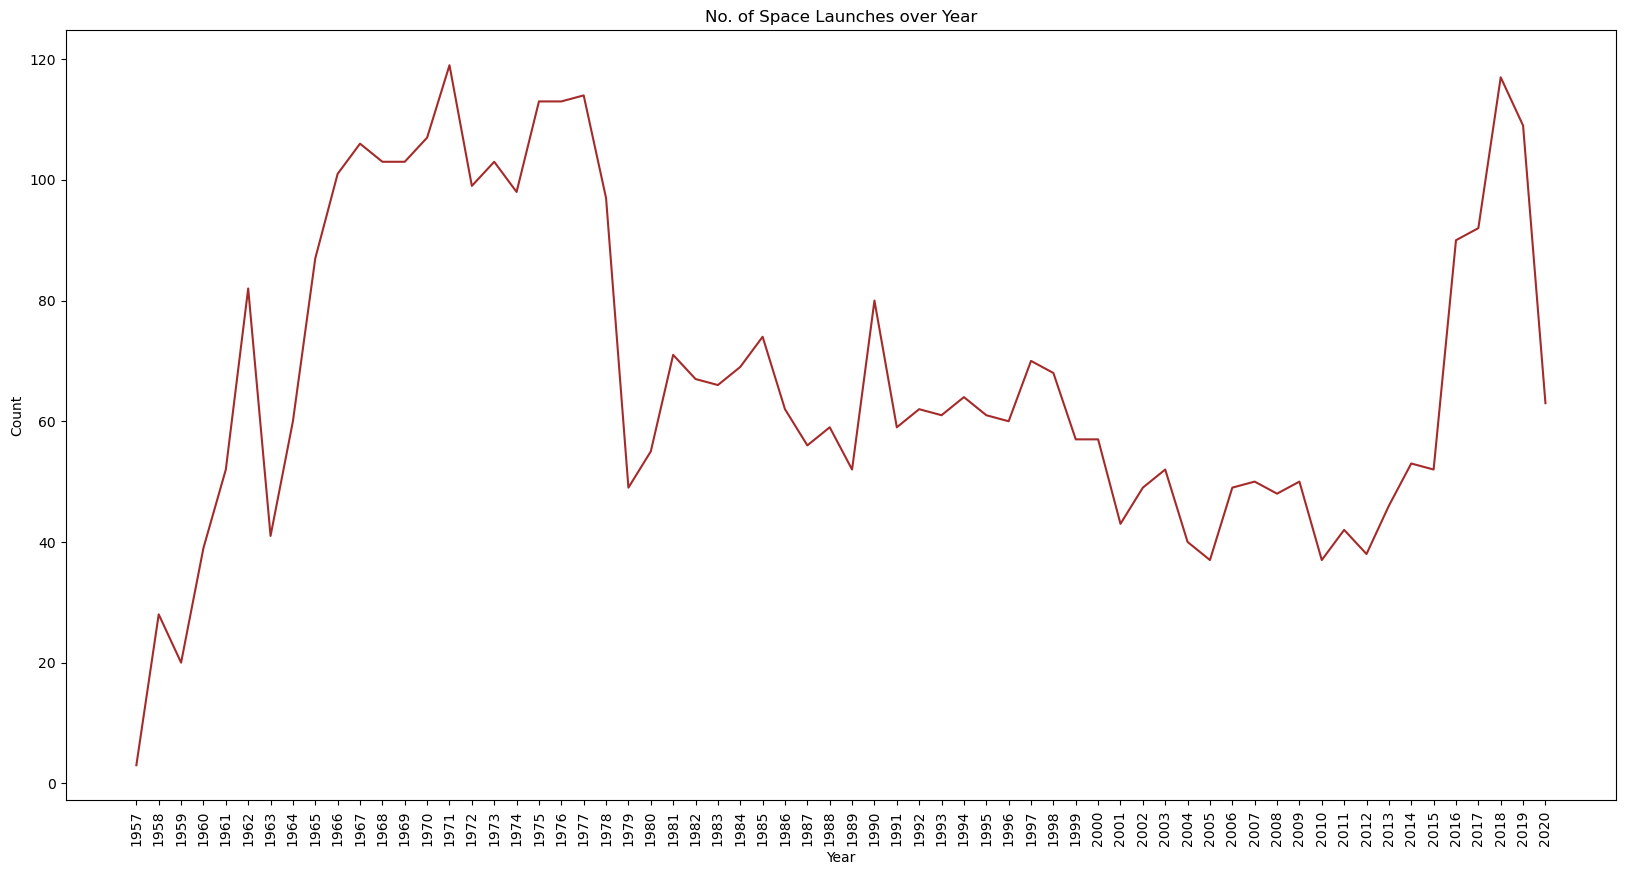

In [132]:
plt.figure(figsize=(20,10))
sb.lineplot(x=a1.index,y=a1.values,color='Brown')
plt.title('No. of Space Launches over Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Are there any noticeable trends in mission outcomes over the years?

In [87]:
a2=df.groupby(['Year','StatusMission']).size().reset_index()
a2

,Year,StatusMission,0
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,20
3,1958,Partial Failure,2
4,1958,Success,6
...,...,...,...
173,2019,Partial Failure,2
174,2019,Prelaunch Failure,1
175,2019,Success,100
176,2020,Failure,6


### Are there any noticible Trends in mission outcome over the years?

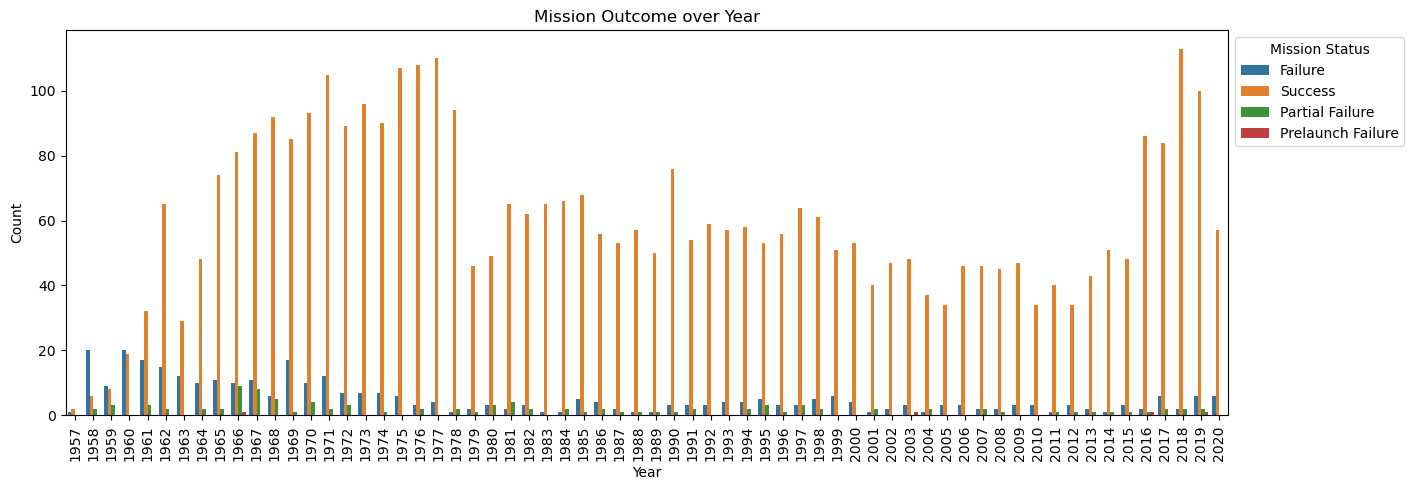

In [88]:
plt.figure(figsize=(15,5))
sb.barplot(x=a2.Year,y=a2[0],hue=a2.StatusMission)
plt.xticks(rotation=90)
plt.title('Mission Outcome over Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Mission Status',bbox_to_anchor=(1.0,1.0))
plt.show()